In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import csv
import pandas as pd
import sympy as sym
import fprlib as fp

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [56]:
meas_dir = os.fsencode('./meritve')

meas_dict = {}
for fname in os.listdir(meas_dir):
    if fname!=b'.ipynb_checkpoints':
        with open(os.path.join(meas_dir, fname)) as file:
            meas = [[float(el) for el in row.split('\t')]
                for row in file.readlines()]
            meas_name = os.fsdecode(fname).removesuffix('.txt')
            meas_dict[meas_name] = np.array(meas).T

In [13]:
# Vzdolž : -0.08m to 0.08cm by 0.005m
# Prečno : L0.085m to D0.085m by 0.001m

1.0 U_max = 0.00431979 +- 0.0001 @ x_0 = (-0.030 +- 0.001) m
0.7 U_max = 0.00303289 +- 0.0001 @ x_1 = (+0.065 +- 0.001) m
g = 0.0950+/-0.0014 m


C:\Users\X\AppData\Local\Temp\ipykernel_4984\4263555316.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


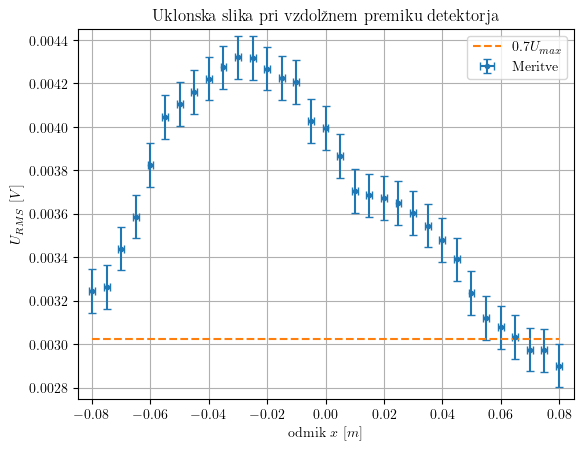

In [381]:
x_axis = np.linspace(-80, 80, 33)/1000
xerr = [0.001] *33 

y_axis = [0.00324443, 0.00326352, 0.00343932, 0.0035864, 0.00382466, 0.0040451, 0.00410603, 0.0041598600000000005, 0.00422212, 0.00427388, 0.0043197900000000004, 0.00431612, 0.00426812, 0.00422404, 0.00420606, 0.00402769, 0.00399547, 0.00386615, 0.00370477, 0.00368448, 0.00367193, 0.00364895, 0.00360268, 0.00354494, 0.00347856, 0.00339061, 0.00323569, 0.00311961, 0.00307757, 0.00303289, 0.00297466, 0.00297143, 0.00290184]
yerr = [0.1/1000] * 33

U_max = np.round(np.max(y_axis), decimals=8)

print("1.0 U_max = " + str(U_max) + r" +- " + str(yerr[0]) + r" @ x_0 = (-0.030 +- 0.001) m")
x = ufloat(-0.030, 0.001)
print("0.7 U_max = " + str(y_axis[29]) + r" +- " + str(yerr[0]) + r" @ x_1 = (+0.065 +- 0.001) m")
x_1 = ufloat(0.065, 0.001)

g = x_1 - x
print("g = " + str(g) + " m" )


# Grafiranje:

fig, ax = plt.subplots()


ax.errorbar(x_axis, y_axis, xerr=xerr, yerr=yerr, fmt=".", capsize=3, label='Meritve')
ax.plot([-0.08, 0.08], [np.max(y_axis)*0.7, np.max(y_axis)*0.7], label=r"$0.7 U_{max}$", ls = "--")
ax.grid(True, which="both")
plt.ylabel(r"$U_{RMS}$ [$V$]")
plt.xlabel(r"odmik $x$ [$m$]")
plt.legend(loc='upper right')
ax.set_ylim([0.00275, 0.00445])
ax.set_xlim([-0.085, 0.085])
plt.title("Uklonska slika pri vzdolžnem premiku detektorja")
fig.show()
fig.savefig("ukl_vzdolz", dpi=300, bbox_inches='tight', transparent=True)

C:\Users\X\AppData\Local\Temp\ipykernel_4984\1441948270.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


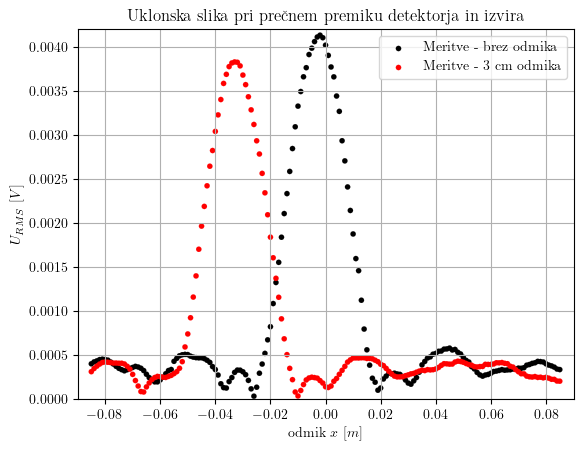

In [393]:
x_axis = np.linspace(-85, 85, 171)/1000
xerr = [0.0005] * 171

y_axis_0 = meas_dict["precno"][0]/1000
y_axis_3 = meas_dict["precno-domik"][0]/1000
yerr = [0.1/1000] * 171

# Grafiranje:

fig, ax = plt.subplots()


ax.scatter(x_axis, y_axis_0, lw=0.1 , label='Meritve - brez odmika', c = "black", s = [15]*171)
ax.scatter(x_axis, y_axis_3, lw=0.1 , label=r'Meritve - $3$ cm odmika', c = "red"  , s = [15]*171)
ax.grid(True, which="both")
plt.ylabel(r"$U_{RMS}$ [$V$]")
plt.xlabel(r"odmik $x$ [$m$]")
plt.legend(loc='best')
ax.set_ylim([0, 0.0042])
ax.set_xlim([-0.09, 0.09])
plt.title("Uklonska slika pri prečnem premiku detektorja in izvira")
fig.show()
fig.savefig("ukl_precno", dpi=300, bbox_inches='tight', transparent=True)

In [453]:
lamb = ufloat( np.average([0.091, 0.090]), np.std([0.091, 0.090])  )/10

print("Lambda = " + str(lamb))

U_ptp =     [2.45, 2.50, 2.48, 2.33, 2.40, 2.05, 2.02, 2.12, 2.00, 1.95, 0.220, 4.750, 2.840,       0.580,   2.120,   7.001]
U_ptp_err = [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.150, 0.150, 0.150,       0.100,   0.100,   0.200]
leča =      [[1] , [2] , [3] , [4] , [5] , [6] , [7] , [8] , [9] , [10], [1,2], [2,4], [1,3,4], [1,2,3,4], [6,7,8], [3,5,7]]

print("-------------------------------------")
print("n, U_rms, U_rms_err")
print("-------------------------------------")

for i in range(len(U_ptp)):
    U_ptp[i] = U_ptp[i] / (2*np.sqrt(2))
    U_ptp_err[i] = U_ptp_err[i] / (2*np.sqrt(2))
    print((leča[i], np.round(U_ptp[i], decimals=2), np.round(U_ptp_err[i], decimals=2)))
#liha leča

r_1 = ufloat(0.0487, 0.0001)
n = 1
a = ufloat(0.55, 0.005)

f = r_1**2/(lamb*n)

b = (1/f - 1/a)**-1

print(f)
print(b)



Lambda = 0.00905+/-0.00005
-------------------------------------
n, U_rms, U_rms_err
-------------------------------------
([1], 0.87, 0.04)
([2], 0.88, 0.04)
([3], 0.88, 0.04)
([4], 0.82, 0.04)
([5], 0.85, 0.04)
([6], 0.72, 0.04)
([7], 0.71, 0.04)
([8], 0.75, 0.04)
([9], 0.71, 0.04)
([10], 0.69, 0.04)
([1, 2], 0.08, 0.05)
([2, 4], 1.68, 0.05)
([1, 3, 4], 1.0, 0.05)
([1, 2, 3, 4], 0.21, 0.04)
([6, 7, 8], 0.75, 0.04)
([3, 5, 7], 2.48, 0.07)
0.2621+/-0.0018
0.501+/-0.008
